# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# cities2 = ['touros', 'saint anthony', 'san patricio']

# set up lists to hold reponse info -- append to it in the loop below
name = []
lat = []
temp = []
wind = []
humid = []
clouds = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing record: {city}.")
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
    except:
        # Append null values
        print(f"City: {city} was mot found. Skipping...")
#         print("City not found skipping")
        pass


Processing record: harper.
Processing record: labuan.
Processing record: vaini.
Processing record: borama.
City: borama was mot found. Skipping...
Processing record: heidelberg.
Processing record: sur.
Processing record: qostanay.
Processing record: port alfred.
Processing record: saint-malo.
Processing record: amderma.
City: amderma was mot found. Skipping...
Processing record: castro.
Processing record: illoqqortoormiut.
City: illoqqortoormiut was mot found. Skipping...
Processing record: ushuaia.
Processing record: natitingou.
Processing record: puerto ayora.
Processing record: zhangye.
Processing record: bahia honda.
Processing record: fort nelson.
Processing record: katsuura.
Processing record: dombarovskiy.
Processing record: ponta delgada.
Processing record: rock sound.
Processing record: qaanaaq.
Processing record: hervey bay.
Processing record: mataura.
Processing record: albany.
Processing record: tiksi.
Processing record: tasiilaq.
Processing record: hvide sande.
Processing 

Processing record: nanortalik.
Processing record: ucluelet.
Processing record: leshukonskoye.
Processing record: vao.
Processing record: ilulissat.
Processing record: mahebourg.
Processing record: faanui.
Processing record: dikson.
Processing record: jackson.
Processing record: tsihombe.
City: tsihombe was mot found. Skipping...
Processing record: rincon.
Processing record: saint-pierre.
Processing record: lesnoye.
Processing record: okhotsk.
Processing record: susanville.
Processing record: ampanihy.
Processing record: mokhsogollokh.
Processing record: sume.
Processing record: simoes.
Processing record: zhigansk.
Processing record: sulangan.
Processing record: samusu.
City: samusu was mot found. Skipping...
Processing record: clyde river.
Processing record: port macquarie.
Processing record: high level.
Processing record: cockburn town.
Processing record: longyan.
Processing record: jega.
Processing record: ancud.
Processing record: menuma.
Processing record: awjilah.
Processing recor

Processing record: itarema.
Processing record: san cristobal.
Processing record: bemidji.
Processing record: marawi.
Processing record: san quintin.
Processing record: saint-ambroise.
Processing record: bilma.
Processing record: macamic.
Processing record: vredendal.
Processing record: nazas.
Processing record: naze.
Processing record: mbandaka.
Processing record: medveditskiy.
Processing record: north bend.
Processing record: belaya gora.
Processing record: bolshaya rechka.
Processing record: amapa.
Processing record: grand-lahou.
Processing record: makubetsu.
Processing record: the pas.
Processing record: waipawa.
Processing record: yabassi.
Processing record: xushan.
Processing record: olga.
Processing record: sola.
Processing record: luderitz.
Processing record: varzea da palma.
Processing record: palmer.
Processing record: victoria point.
Processing record: pozo colorado.
Processing record: am timan.
Processing record: oxapampa.
Processing record: chichica.
Processing record: luan

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, lat, and temp -- dictionary to a pd.DataFrame
weather_dict = {
    "city": name,
    "lat": lat,
    "temp": temp,
    "humidity": humid,
    "wind": wind,
    "cloudiness": clouds
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(100)

,city,lat,temp,humidity,wind,cloudiness
0,Harper,4.38,75.65,77,9.55,80
1,Labuan,5.28,78.80,100,6.53,20
2,Vaini,-21.20,68.00,94,5.82,40
3,Heidelberg,-26.50,51.01,54,5.26,0
4,Sur,22.57,88.02,59,16.20,100
...,...,...,...,...,...,...
95,Norman Wells,65.28,71.60,49,11.41,75
96,Broome,42.25,86.00,35,10.29,1
97,Zonguldak,41.25,63.25,90,2.44,0
98,Sarāhan,31.52,62.94,77,0.47,51


In [8]:
weather_data.to_csv('Datafolder/weather_data_df.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_data.dtypes

city           object
lat           float64
temp          float64
humidity        int64
wind          float64
cloudiness      int64
dtype: object

In [13]:
#  Get the indices of cities that have humidity over 100%.
ind_humidity = weather_data.index[weather_data["humidity"]>100]
ind_humidity

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
                            
# No observations with Humidity over 100

In [ ]:
# Extract relevant fields from the data frame
#no need as there was nothing cleaned up

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

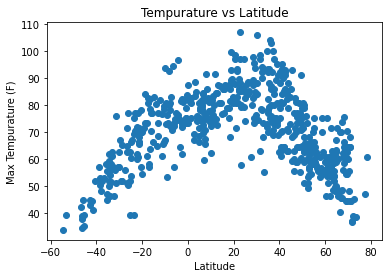

In [14]:
## Convert to floats and store Latitude and Tempurature as x and y values
x_values = weather_data['lat']
y_values = weather_data['temp']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.title('Tempurature vs Latitude')

# Show plot
plt.show()

## Latitude vs. Humidity Plot

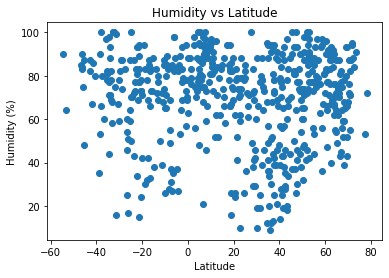

In [20]:
## Convert to floats and store Latitude and Humidty as x and y values
x_values = weather_data['lat']
y_values = weather_data['humidity']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude')

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

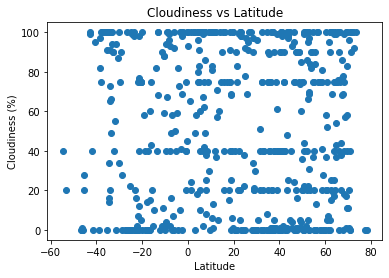

In [21]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = weather_data['lat']
y_values = weather_data['cloudiness']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

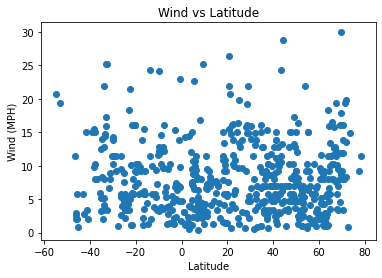

In [22]:
## Convert to floats and store Latitude and wind as x and y values
x_values = weather_data['lat']
y_values = weather_data['wind']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
plt.title('Wind vs Latitude')

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression